In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("C:\\Users\smailey\Desktop\lecture\csv\wineQualityReds.csv")

In [3]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df['quality'].unique

<bound method Series.unique of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [8]:
len(df['quality'].unique())

6

In [9]:
len(df['quality']== 5)

1599

In [10]:
df['quality'].nunique()

6

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile.acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric.acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual.sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free.sulfur.dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total.sulfur.dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [14]:
df.duplicated().sum()

240

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
X = df.drop('quality',axis=1)

In [18]:
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [19]:
y = df.quality

In [20]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
X_train.shape

(1087, 11)

In [23]:
X_test.shape

(272, 11)

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
model.score(X_test,y_test)

0.4963235294117647

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

<function matplotlib.pyplot.show(close=None, block=None)>

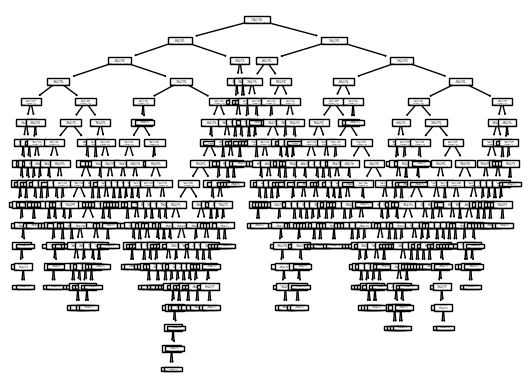

<Figure size 1200x800 with 0 Axes>

In [28]:
tree.plot_tree(model.fit(X_train,y_train))
plt.figure(figsize=(12,8))
plt.show

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

In [32]:
import seaborn as sns

<Axes: >

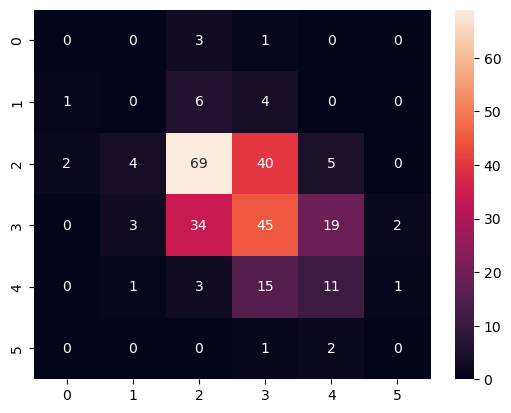

In [33]:
sns.heatmap(cm,annot=True)

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
model1 = AdaBoostClassifier()

In [36]:
model1.fit(X_train,y_train)

AdaBoostClassifier()

In [37]:
model1.score(X_test,y_test)

0.5477941176470589

In [38]:
model2 = AdaBoostClassifier(learning_rate=0.02,n_estimators=120)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.5735294117647058

In [39]:
y_pred = model2.predict(X_test)
y_pred

array([5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6,
       5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 6, 6, 5], dtype=int64)

In [40]:
cm = confusion_matrix(y_test,y_pred)

In [41]:
cm

array([[ 0,  0,  2,  2,  0,  0],
       [ 0,  0,  4,  7,  0,  0],
       [ 0,  0, 85, 35,  0,  0],
       [ 0,  0, 32, 71,  0,  0],
       [ 0,  0,  1, 30,  0,  0],
       [ 0,  0,  0,  3,  0,  0]], dtype=int64)

<Axes: >

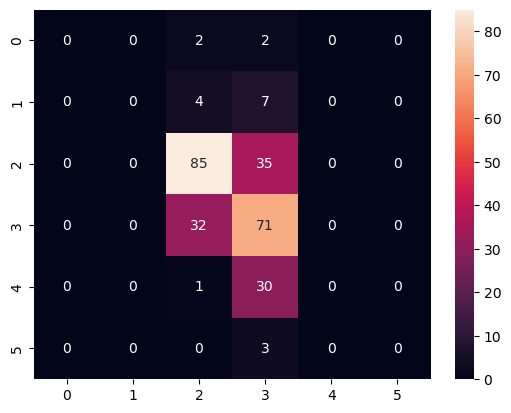

In [42]:
sns.heatmap(cm,annot=True)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
model3 = GradientBoostingClassifier()

In [45]:
model3.fit(X_train,y_train)

GradientBoostingClassifier()

In [46]:
model3.score(X_test,y_test)

0.6286764705882353

In [47]:
model3 = GradientBoostingClassifier(n_estimators=250,learning_rate=0.05,random_state=100,max_features=5)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.6176470588235294

In [48]:
import xgboost

In [49]:
boost = xgboost.XGBClassifier()

In [50]:
boost.fit(X_train,y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]